In [137]:
def estimate():
    theta0 = 1.0252834318374369
    theta1 =  -0.6209591389634159
    mileage = 76025 / 240000
    return (theta0 + (theta1 * mileage)) * 8290


In [138]:
estimate()

6868.942192873765

In [12]:
import csv

def read_csv_as_tuples(file_path):
    tuples_list = []
    with open(file_path, mode='r', newline='') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip the header row
        for row in csv_reader:
            if len(row) >= 2:  # Ensure there are at least 2 columns
                tuples_list.append((int(row[0]), int(row[1])))
    return tuples_list

# Example usage
file_path = 'data.csv'
data = read_csv_as_tuples(file_path)
print(data)

[(240000, 3650), (139800, 3800), (150500, 4400), (185530, 4450), (176000, 5250), (114800, 5350), (166800, 5800), (89000, 5990), (144500, 5999), (84000, 6200), (82029, 6390), (63060, 6390), (74000, 6600), (97500, 6800), (67000, 6800), (76025, 6900), (48235, 6900), (93000, 6990), (60949, 7490), (65674, 7555), (54000, 7990), (68500, 7990), (22899, 7990), (61789, 8290)]


In [104]:
# Sample array of tuples
array_of_tuples = data

# Step 1: Extract the first and second elements
first_elements = [t[0] for t in array_of_tuples]
second_elements = [t[1] for t in array_of_tuples]

# Step 2: Find the maximum values
max_first = max(first_elements)
max_second = max(second_elements)
print(max_first, max_second)

# Step 3 & 4: Normalize the elements
normalized_tuples = [(t[0] / max_first, t[1] / max_second) for t in array_of_tuples]

# Output the normalized array of tuples
print(normalized_tuples)

240000 8290
[(1.0, 0.44028950542822676), (0.5825, 0.4583835946924005), (0.6270833333333333, 0.5307599517490953), (0.7730416666666666, 0.5367913148371531), (0.7333333333333333, 0.6332931242460796), (0.47833333333333333, 0.6453558504221955), (0.695, 0.6996381182147166), (0.37083333333333335, 0.7225572979493365), (0.6020833333333333, 0.723642943305187), (0.35, 0.7478890229191797), (0.3417875, 0.7708082026537998), (0.26275, 0.7708082026537998), (0.30833333333333335, 0.7961399276236429), (0.40625, 0.8202653799758746), (0.2791666666666667, 0.8202653799758746), (0.31677083333333333, 0.8323281061519904), (0.20097916666666665, 0.8323281061519904), (0.3875, 0.8431845597104946), (0.25395416666666665, 0.9034981905910736), (0.27364166666666667, 0.9113389626055488), (0.225, 0.9638118214716526), (0.28541666666666665, 0.9638118214716526), (0.0954125, 0.9638118214716526), (0.25745416666666665, 1.0)]


In [135]:
def train(data, iterations, learningRate):
    theta0 = 0
    theta1 = 0
    m = len(data)

    for _ in range(iterations):
        tmp_theta0 = 0
        tmp_theta1 = 0
        for d in data:
            estimated_price = theta0 + (theta1 * d[0])
            tmp_theta0 += estimated_price - d[1]
            tmp_theta1 += (estimated_price - d[1]) * d[0]
        tmp_theta0 = tmp_theta0 / m * learningRate
        tmp_theta1 = tmp_theta1 / m * learningRate
        theta0 -= tmp_theta0
        theta1 -= tmp_theta1
    return theta0, theta1
        


In [134]:
print(train(normalized_tuples, 100000, 0.01))

(1.0252834318374369, -0.6209591389634159)


In [136]:
print(train(normalized_tuples, 100000, 0.01))

(1.0252834318374369, -0.6209591389634159)


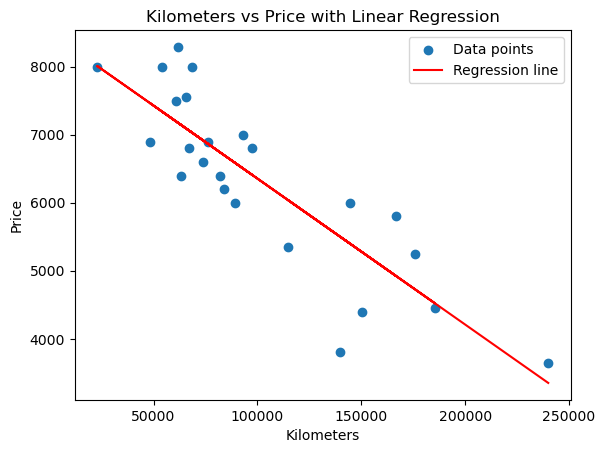

In [131]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Step 2: Read the CSV file into a pandas DataFrame
# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('data.csv')

# Step 3: Plot the scatter plot of the data
plt.scatter(df['km'], df['price'], label='Data points')

# Step 4: Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(df['km'], df['price'])
regression_line = slope * df['km'] + intercept

# Step 5: Plot the linear regression line on the scatter plot
plt.plot(df['km'], regression_line, color='red', label='Regression line')
plt.xlabel('Kilometers')
plt.ylabel('Price')
plt.title('Kilometers vs Price with Linear Regression')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def read_csv(file_path):
    return pd.read_csv(file_path)

def plot_scatter(df):
    plt.scatter(df['km'], df['price'], label='Data points')

def calculate_regression(df):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['km'], df['price'])
    regression_line = slope * df['km'] + intercept
    return regression_line, slope, intercept

def plot_regression_line(df, regression_line):
    plt.plot(df['km'], regression_line, color='red', label='Regression line')
    plt.xlabel('Kilometers')
    plt.ylabel('Price')
    plt.title('Kilometers vs Price with Linear Regression')
    plt.legend()
    plt.show()

def main():
    import_libraries()
    df = read_csv('data.csv')
    plot_scatter(df)
    regression_line, slope, intercept = calculate_regression(df)
    plot_regression_line(df, regression_line)

if __name__ == "__main__":
    main()

In [ ]:
def main():
    